In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# importing warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and understanding the data



In [3]:
bike_data = pd.read_csv(r"C:\Users\manis\Downloads\day.csv")

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# number of columns and rows
bike_data.shape

(730, 16)

In [6]:
# description of the numerical variables
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# null values in the data set
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values either in rows or columns

In [9]:
## the column date year and months are present in separate columns, so we can drop the dteday column
bike_data.drop('dteday',axis=1,inplace=True)

In [10]:
#instant is depicting nothing but the number of rows, so we can drop it
bike_data.drop('instant',axis=1,inplace=True)

In [11]:
# the sum or casual and registered is showing in column cnt, so we can drop them
bike_data.drop(['registered','casual'],axis=1,inplace=True)

In [12]:
bike_data.shape

(730, 12)

# 3.0 Exploratory data Analysis


In [13]:
## renaming the categorical column values according to the data dictionary
bike_data.season.replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'},inplace=True)
bike_data.weathersit.replace({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'},inplace=True)
bike_data.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'},inplace=True)

bike_data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'},inplace=True)
bike_data.yr.replace({0:'2018',1:'2019'},inplace=True)

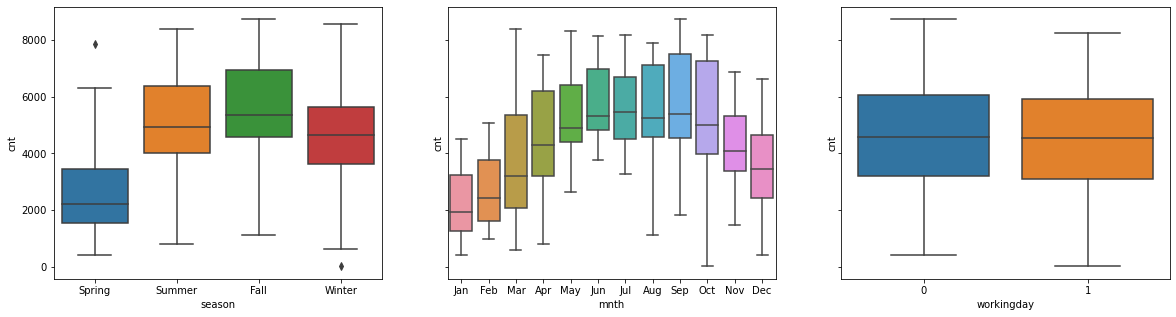

In [14]:
# ploting box plot for these (season , mnth , yr , holiday , weekday , weathersit ,workingday) variables
fig,ax=plt.subplots(1,3,figsize=(20,5),sharey=True)
sns.boxplot(data=bike_data,x='season',y='cnt',ax=ax[0])
sns.boxplot(data=bike_data,x='mnth',y='cnt',ax=ax[1])
sns.boxplot(data=bike_data,x='workingday',y='cnt',ax=ax[2])
plt.show()


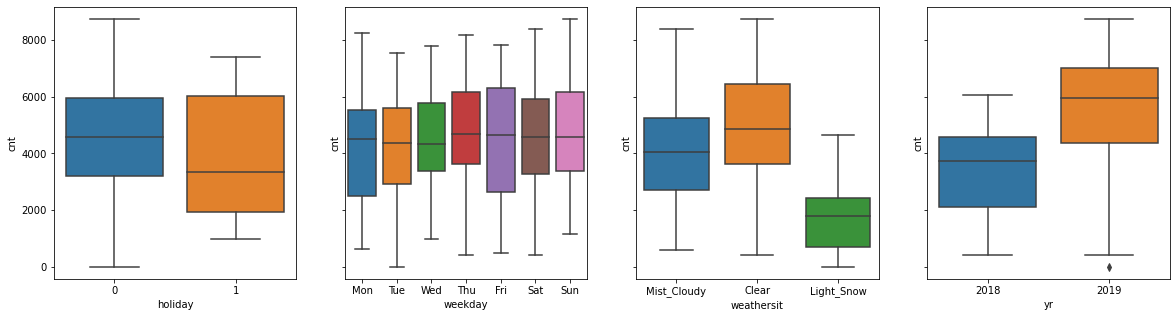

In [15]:
# ploting box plot for these {season','mnth','yr','holiday','weekday','weathersit','workingday' variables
fig,ax=plt.subplots(1,4,figsize=(20,5),sharey=True)
sns.boxplot(data=bike_data,x='holiday',y='cnt',ax=ax[0])
sns.boxplot(data=bike_data,x='weekday',y='cnt',ax=ax[1])
sns.boxplot(data=bike_data,x='weathersit',y='cnt',ax=ax[2])
sns.boxplot(data=bike_data,x='yr',y='cnt',ax=ax[3])
plt.show()



# Insights
1.using the boxplot visualisation we get many correlation between the categorical variable and the target variable

2.we analayse that season fall has the highest count of rented bikes to customer

3.comparing to year 2018 , 2019 has the highest sales in renting bikes  the median value is nearly ea\qual to 6000,

4.In weathersit categorical variable analysis ,customer rented more no of bikes in clear weather for safe ride,while very few people rented bike when weather changes to little snow fall

5.In monthy we can see the increase in sales of rented bikes  from march to october


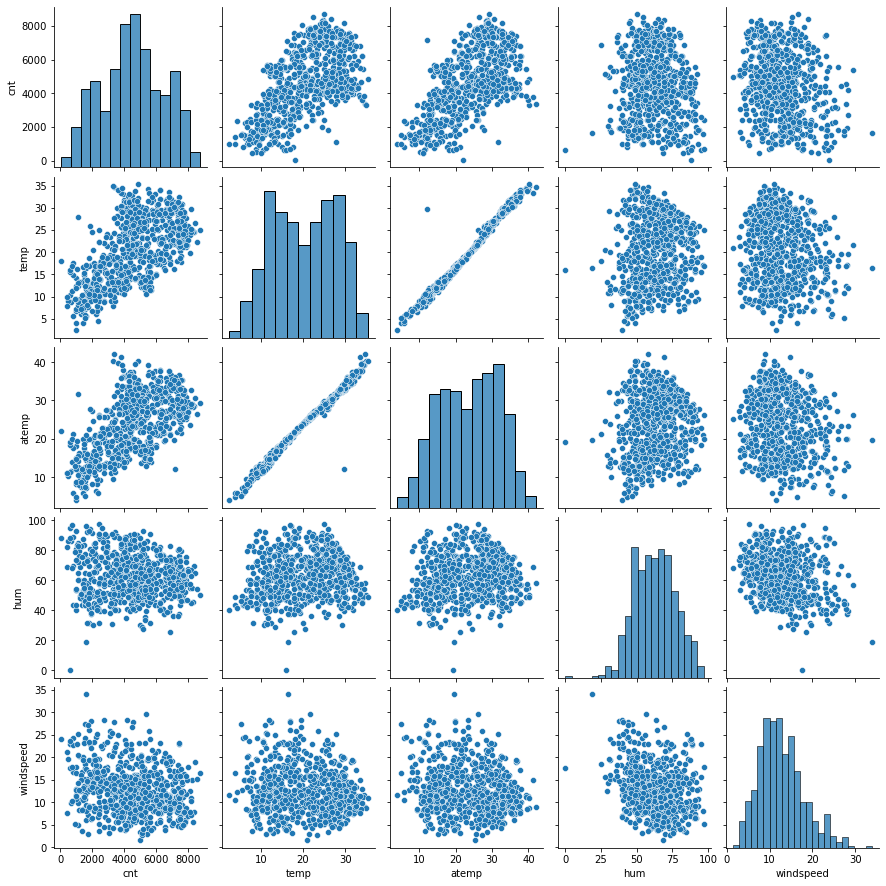

In [16]:
cont_vars=['cnt','temp','atemp','hum','windspeed']
sns.pairplot(data=bike_data,vars=cont_vars)

Inferences:
1. Atemp and temp are correlated with each other
2. atemp and temp have high correlation with cnt 

In [17]:
#temp and atemp have high correlation with each other, so we can drop any one of them
bike_data=bike_data.drop('atemp',axis=1)

[]

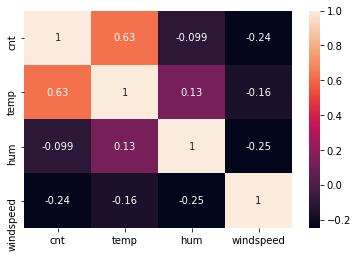

In [18]:
#checking the correlation 
sns.heatmap(bike_data[['cnt','temp','hum','windspeed']].corr(),annot=True)
plt.plot()

In [19]:
# creating dummy variables for categorical features
bike_data=pd.get_dummies(data=bike_data,columns=['season','mnth','yr','weekday','weathersit'],drop_first=True)

In [20]:
bike_data.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# splitting the data into train and test set

In [21]:
bike_data_train , bike_data_test = train_test_split(bike_data,test_size=0.2,random_state=50)

In [22]:
print(bike_data_train.shape)
print(bike_data_test.shape)

(584, 29)
(146, 29)


In [23]:
bike_data_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
252,0,1,27.060000,75.3750,10.291736,5345,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
503,0,0,24.600000,45.6250,5.626325,8294,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
157,0,1,29.007500,59.7917,12.583136,4833,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
356,0,0,15.306653,68.6250,18.374482,2209,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
100,0,1,24.421732,71.6956,21.739758,3348,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [24]:
#rescaling
scaler=StandardScaler()

var_scale=  ['cnt','temp','hum','windspeed']
bike_data_train[var_scale]=scaler.fit_transform(bike_data_train[var_scale])

In [25]:
bike_data_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
252,0,1,0.914340,0.910502,-0.501993,0.436694,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
503,0,0,0.583569,-1.184015,-1.399110,1.946875,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
157,0,1,1.176201,-0.186624,-0.061377,0.174500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
356,0,0,-0.666012,0.435275,1.052246,-1.169249,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
100,0,1,0.559599,0.651457,1.699359,-0.585968,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [26]:
#splitting the data into X and y sets
y_train=bike_data_train.pop('cnt')
X_train=bike_data_train

In [27]:
print(X_train.shape)
print(y_train.shape)

(584, 28)
(584,)


In [28]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg=sm.OLS(y_train,X_train_lm).fit()

In [29]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.15e-211
Time:                        22:49:39   Log-Likelihood:                -267.22
No. Observations:                 584   AIC:                             592.4
Df Residuals:                     555   BIC:                             719.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0587      0.331     -0.177      0.859      -0.709       0.591
holiday                   -0.5911      0.286     -2.070      0.039      -1.152      -0.030
workingday                -0.3005      0.307     -0.979      0.328      -0.903       0.302
temp                       0.4178      0.044      9.480      0.000       0.331       0.504
hum                       -0.1263      0.024     -5.323      0.000      -0.173      -0.080
windspeed                 -0.1225      0.018     -6.810      0.000      -0.158      -0.087
season_Spring             -0.3716      0.122     -3.056      0.002      -0.610      -0.133
season_Summer              0.0549      0.101      0.543      0.587      -0.144       0.254
season_Winter              0.5084      0.114      4.470      0.000       0.285       0.732
mnth_Aug                   0.0165      0.136      0.121      0.904      -0.250       0.283
mnth_Dec                  -0.3648      0.140     -2.601      0.010      -0.640      -0.089
mnth_Feb                  -0.1692      0.137     -1.233      0.218      -0.439       0.100
mnth_Jan                  -0.2851      0.143     -1.987      0.047      -0.567      -0.003
mnth_Jul                  -0.1147      0.141     -0.815      0.415      -0.391       0.162
mnth_Jun                   0.0411      0.101      0.407      0.684      -0.157       0.239
mnth_Mar                  -0.0029      0.108     -0.026      0.979      -0.215       0.209
mnth_May                   0.1466      0.085      1.730      0.084      -0.020       0.313
mnth_Nov                  -0.3843      0.151     -2.539      0.011      -0.682      -0.087
mnth_Oct                  -0.0891      0.148     -0.601      0.548      -0.380       0.202
mnth_Sep                   0.3024      0.129      2.343      0.019       0.049       0.556
yr_2019                    1.0264      0.033     30.775      0.000       0.961       1.092
weekday_Mon               -0.0831      0.062     -1.332      0.183      -0.206       0.039
weekday_Sat               -0.2523      0.309     -0.815      0.415      -0.860       0.355
weekday_Sun               -0.2096      0.310     -0.677      0.499      -0.818       0.398
weekday_Thu                0.0376      0.061      0.615      0.539      -0.082       0.158
weekday_Tue               -0.1098      0.062     -1.781      0.075      -0.231       0.011
weekday_Wed               -0.0301      0.062     -0.481      0.630      -0.153       0.093
weathersit_Light_Snow     -0.9678      0.111     -8.755      0.000      -1.185      -0.751
weathersit_Mist_Cloudy    -0.2130      0.044     -4.820      0.000      -0.300      -0.126
==============================================================================
Omnibus:                      108.651   Durbin-Watson:                   2.025
Prob(Omnibus)

In [30]:
# mnth_Mar has the highest p value , so we will drop it
X_train=X_train.drop('mnth_Mar',1)

In [31]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_1=sm.OLS(y_train,X_train_lm).fit()

In [32]:
reg_1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.84e-212
Time:                        22:49:39   Log-Likelihood:                -267.22
No. Observations:                 584   AIC:                             590.4
Df Residuals:                     556   BIC:                             712.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0602      0.326     -0.185      0.854      -0.701       0.580
holiday                   -0.5911      0.285     -2.072      0.039      -1.152      -0.031
workingday                -0.3005      0.307     -0.980      0.328      -0.903       0.302
temp                       0.4180      0.043      9.677      0.000       0.333       0.503
hum                       -0.1264      0.024     -5.335      0.000      -0.173      -0.080
windspeed                 -0.1225      0.018     -6.818      0.000      -0.158      -0.087
season_Spring             -0.3727      0.113     -3.285      0.001      -0.596      -0.150
season_Summer              0.0555      0.099      0.562      0.575      -0.139       0.250
season_Winter              0.5077      0.111      4.588      0.000       0.290       0.725
mnth_Aug                   0.0176      0.128      0.137      0.891      -0.234       0.270
mnth_Dec                  -0.3623      0.104     -3.482      0.001      -0.567      -0.158
mnth_Feb                  -0.1664      0.087     -1.905      0.057      -0.338       0.005
mnth_Jan                  -0.2822      0.094     -3.017      0.003      -0.466      -0.098
mnth_Jul                  -0.1136      0.134     -0.846      0.398      -0.377       0.150
mnth_Jun                   0.0419      0.096      0.435      0.663      -0.147       0.231
mnth_May                   0.1474      0.080      1.845      0.066      -0.010       0.304
mnth_Nov                  -0.3820      0.125     -3.063      0.002      -0.627      -0.137
mnth_Oct                  -0.0870      0.124     -0.701      0.484      -0.331       0.157
mnth_Sep                   0.3039      0.116      2.609      0.009       0.075       0.533
yr_2019                    1.0264      0.033     30.809      0.000       0.961       1.092
weekday_Mon               -0.0831      0.062     -1.334      0.183      -0.205       0.039
weekday_Sat               -0.2522      0.309     -0.816      0.415      -0.859       0.355
weekday_Sun               -0.2096      0.309     -0.678      0.498      -0.817       0.398
weekday_Thu                0.0376      0.061      0.615      0.539      -0.082       0.157
weekday_Tue               -0.1097      0.062     -1.783      0.075      -0.231       0.011
weekday_Wed               -0.0301      0.062     -0.482      0.630      -0.153       0.093
weathersit_Light_Snow     -0.9678      0.110     -8.764      0.000      -1.185      -0.751
weathersit_Mist_Cloudy    -0.2130      0.044     -4.825      0.000      -0.300      -0.126
==============================================================================
Omnibus:                      108.660   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.966
Skew:                    

In [33]:
# mnth_Aug has the highest p value , so we will drop it
X_train=X_train.drop('mnth_Aug',1)

In [34]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_2=sm.OLS(y_train,X_train_lm).fit()

In [35]:
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     125.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.54e-213
Time:                        22:49:39   Log-Likelihood:                -267.23
No. Observations:                 584   AIC:                             588.5
Df Residuals:                     557   BIC:                             706.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0499      0.317     -0.157      0.875      -0.673       0.573
holiday                   -0.5909      0.285     -2.073      0.039      -1.151      -0.031
workingday                -0.2994      0.306     -0.978      0.329      -0.901       0.302
temp                       0.4203      0.040     10.540      0.000       0.342       0.499
hum                       -0.1265      0.024     -5.348      0.000      -0.173      -0.080
windspeed                 -0.1228      0.018     -6.885      0.000      -0.158      -0.088
season_Spring             -0.3815      0.093     -4.082      0.000      -0.565      -0.198
season_Summer              0.0464      0.073      0.633      0.527      -0.098       0.190
season_Winter              0.5022      0.103      4.869      0.000       0.300       0.705
mnth_Dec                  -0.3653      0.102     -3.592      0.000      -0.565      -0.166
mnth_Feb                  -0.1668      0.087     -1.911      0.057      -0.338       0.005
mnth_Jan                  -0.2820      0.093     -3.017      0.003      -0.466      -0.098
mnth_Jul                  -0.1286      0.079     -1.636      0.102      -0.283       0.026
mnth_Jun                   0.0335      0.074      0.452      0.652      -0.112       0.179
mnth_May                   0.1436      0.075      1.917      0.056      -0.004       0.291
mnth_Nov                  -0.3866      0.120     -3.221      0.001      -0.622      -0.151
mnth_Oct                  -0.0930      0.116     -0.804      0.422      -0.320       0.134
mnth_Sep                   0.2921      0.079      3.714      0.000       0.138       0.447
yr_2019                    1.0262      0.033     30.855      0.000       0.961       1.092
weekday_Mon               -0.0824      0.062     -1.328      0.185      -0.204       0.039
weekday_Sat               -0.2510      0.309     -0.813      0.417      -0.857       0.355
weekday_Sun               -0.2080      0.309     -0.674      0.501      -0.815       0.399
weekday_Thu                0.0377      0.061      0.618      0.537      -0.082       0.157
weekday_Tue               -0.1094      0.061     -1.781      0.075      -0.230       0.011
weekday_Wed               -0.0297      0.062     -0.477      0.634      -0.152       0.093
weathersit_Light_Snow     -0.9676      0.110     -8.770      0.000      -1.184      -0.751
weathersit_Mist_Cloudy    -0.2128      0.044     -4.827      0.000      -0.299      -0.126
==============================================================================
Omnibus:                      108.548   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.361
Skew:                          -0.886   Prob(JB):                     1.35e-71
Kurtosis:                       6.205

In [36]:
# mnth_Jun has the highest p value , so we will drop it
X_train=X_train.drop('mnth_Jun',1)

In [37]:
## Modelling
X_train_lm=sm.add_constant(X_train)
reg_3=sm.OLS(y_train,X_train_lm).fit()

In [38]:
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.43e-214
Time:                        22:49:39   Log-Likelihood:                -267.34
No. Observations:                 584   AIC:                             586.7
Df Residuals:                     558   BIC:                             700.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0531      0.317     -0.168      0.867      -0.675       0.569
holiday                   -0.5917      0.285     -2.077      0.038      -1.151      -0.032
workingday                -0.2971      0.306     -0.971      0.332      -0.898       0.304
temp                       0.4283      0.036     12.004      0.000       0.358       0.498
hum                       -0.1283      0.023     -5.511      0.000      -0.174      -0.083
windspeed                 -0.1236      0.018     -6.979      0.000      -0.158      -0.089
season_Spring             -0.3764      0.093     -4.060      0.000      -0.559      -0.194
season_Summer              0.0569      0.069      0.819      0.413      -0.080       0.193
season_Winter              0.5041      0.103      4.895      0.000       0.302       0.706
mnth_Dec                  -0.3599      0.101     -3.566      0.000      -0.558      -0.162
mnth_Feb                  -0.1630      0.087     -1.878      0.061      -0.334       0.008
mnth_Jan                  -0.2757      0.092     -2.985      0.003      -0.457      -0.094
mnth_Jul                  -0.1396      0.075     -1.870      0.062      -0.286       0.007
mnth_May                   0.1300      0.069      1.897      0.058      -0.005       0.265
mnth_Nov                  -0.3823      0.120     -3.197      0.001      -0.617      -0.147
mnth_Oct                  -0.0934      0.116     -0.808      0.420      -0.321       0.134
mnth_Sep                   0.2876      0.078      3.689      0.000       0.134       0.441
yr_2019                    1.0248      0.033     30.976      0.000       0.960       1.090
weekday_Mon               -0.0810      0.062     -1.308      0.192      -0.203       0.041
weekday_Sat               -0.2482      0.308     -0.805      0.421      -0.854       0.358
weekday_Sun               -0.2044      0.308     -0.663      0.508      -0.810       0.402
weekday_Thu                0.0386      0.061      0.633      0.527      -0.081       0.158
weekday_Tue               -0.1089      0.061     -1.774      0.077      -0.229       0.012
weekday_Wed               -0.0288      0.062     -0.463      0.643      -0.151       0.093
weathersit_Light_Snow     -0.9645      0.110     -8.766      0.000      -1.181      -0.748
weathersit_Mist_Cloudy    -0.2117      0.044     -4.814      0.000      -0.298      -0.125
==============================================================================
Omnibus:                      106.950   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.263
Skew:                          -0.878   Prob(JB):                     2.11e-69
Kurtosis:                       6.148   Cond. No.                         62.7
=================================================

In [39]:
# weekday_Wed has the highest p value , so we will drop it
X_train=X_train.drop('weekday_Wed',1)

In [40]:
## Modelling
X_train_lm=sm.add_constant(X_train)


reg_4=sm.OLS(y_train,X_train_lm).fit()

In [41]:
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.30e-215
Time:                        22:49:39   Log-Likelihood:                -267.45
No. Observations:                 584   AIC:                             584.9
Df Residuals:                     559   BIC:                             694.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0727      0.314     -0.232      0.817      -0.689       0.544
holiday                   -0.5919      0.285     -2.079      0.038      -1.151      -0.033
workingday                -0.2905      0.305     -0.951      0.342      -0.890       0.309
temp                       0.4283      0.036     12.012      0.000       0.358       0.498
hum                       -0.1285      0.023     -5.522      0.000      -0.174      -0.083
windspeed                 -0.1241      0.018     -7.018      0.000      -0.159      -0.089
season_Spring             -0.3767      0.093     -4.066      0.000      -0.559      -0.195
season_Summer              0.0560      0.069      0.807      0.420      -0.080       0.192
season_Winter              0.5021      0.103      4.883      0.000       0.300       0.704
mnth_Dec                  -0.3591      0.101     -3.562      0.000      -0.557      -0.161
mnth_Feb                  -0.1628      0.087     -1.877      0.061      -0.333       0.008
mnth_Jan                  -0.2773      0.092     -3.007      0.003      -0.458      -0.096
mnth_Jul                  -0.1416      0.074     -1.901      0.058      -0.288       0.005
mnth_May                   0.1300      0.068      1.898      0.058      -0.005       0.265
mnth_Nov                  -0.3814      0.119     -3.192      0.001      -0.616      -0.147
mnth_Oct                  -0.0932      0.116     -0.806      0.420      -0.320       0.134
mnth_Sep                   0.2863      0.078      3.678      0.000       0.133       0.439
yr_2019                    1.0245      0.033     30.995      0.000       0.960       1.089
weekday_Mon               -0.0667      0.054     -1.243      0.214      -0.172       0.039
weekday_Sat               -0.2273      0.305     -0.746      0.456      -0.826       0.372
weekday_Sun               -0.1834      0.305     -0.601      0.548      -0.782       0.416
weekday_Thu                0.0530      0.052      1.015      0.311      -0.050       0.156
weekday_Tue               -0.0942      0.053     -1.794      0.073      -0.197       0.009
weathersit_Light_Snow     -0.9616      0.110     -8.760      0.000      -1.177      -0.746
weathersit_Mist_Cloudy    -0.2125      0.044     -4.837      0.000      -0.299      -0.126
==============================================================================
Omnibus:                      107.012   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.312
Skew:                          -0.878   Prob(JB):                     1.25e-69
Kurtosis:                       6.156   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix

In [42]:
# weekday_Sun has the highest p value , so we will drop it
X_train=X_train.drop('weekday_Sun',1)

In [43]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_5=sm.OLS(y_train,X_train_lm).fit()

In [44]:
reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     141.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.28e-216
Time:                        22:49:39   Log-Likelihood:                -267.64
No. Observations:                 584   AIC:                             583.3
Df Residuals:                     560   BIC:                             688.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2556      0.077     -3.322      0.001      -0.407      -0.104
holiday                   -0.4346      0.112     -3.873      0.000      -0.655      -0.214
workingday                -0.1098      0.055     -2.005      0.045      -0.217      -0.002
temp                       0.4291      0.036     12.050      0.000       0.359       0.499
hum                       -0.1280      0.023     -5.509      0.000      -0.174      -0.082
windspeed                 -0.1244      0.018     -7.043      0.000      -0.159      -0.090
season_Spring             -0.3751      0.093     -4.053      0.000      -0.557      -0.193
season_Summer              0.0573      0.069      0.827      0.409      -0.079       0.193
season_Winter              0.5015      0.103      4.881      0.000       0.300       0.703
mnth_Dec                  -0.3573      0.101     -3.547      0.000      -0.555      -0.159
mnth_Feb                  -0.1613      0.087     -1.862      0.063      -0.332       0.009
mnth_Jan                  -0.2764      0.092     -2.999      0.003      -0.457      -0.095
mnth_Jul                  -0.1410      0.074     -1.895      0.059      -0.287       0.005
mnth_May                   0.1299      0.068      1.897      0.058      -0.005       0.264
mnth_Nov                  -0.3847      0.119     -3.225      0.001      -0.619      -0.150
mnth_Oct                  -0.0920      0.116     -0.797      0.426      -0.319       0.135
mnth_Sep                   0.2874      0.078      3.695      0.000       0.135       0.440
yr_2019                    1.0258      0.033     31.119      0.000       0.961       1.091
weekday_Mon               -0.0658      0.054     -1.228      0.220      -0.171       0.039
weekday_Sat               -0.0476      0.061     -0.785      0.433      -0.167       0.072
weekday_Thu                0.0541      0.052      1.036      0.301      -0.048       0.157
weekday_Tue               -0.0925      0.052     -1.765      0.078      -0.195       0.010
weathersit_Light_Snow     -0.9608      0.110     -8.758      0.000      -1.176      -0.745
weathersit_Mist_Cloudy    -0.2126      0.044     -4.842      0.000      -0.299      -0.126
==============================================================================
Omnibus:                      106.945   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.956
Skew:                          -0.880   Prob(JB):                     4.06e-69
Kurtosis:                       6.138   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# weekday_Sat has the highest p value , so we will drop it
X_train=X_train.drop('weekday_Sat',1)

In [46]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_6=sm.OLS(y_train,X_train_lm).fit()

In [47]:
reg_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.51e-217
Time:                        22:49:39   Log-Likelihood:                -267.96
No. Observations:                 584   AIC:                             581.9
Df Residuals:                     561   BIC:                             682.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2795      0.071     -3.957      0.000      -0.418      -0.141
holiday                   -0.4118      0.108     -3.801      0.000      -0.625      -0.199
workingday                -0.0841      0.044     -1.916      0.056      -0.170       0.002
temp                       0.4273      0.036     12.028      0.000       0.357       0.497
hum                       -0.1276      0.023     -5.495      0.000      -0.173      -0.082
windspeed                 -0.1240      0.018     -7.028      0.000      -0.159      -0.089
season_Spring             -0.3776      0.092     -4.083      0.000      -0.559      -0.196
season_Summer              0.0552      0.069      0.797      0.426      -0.081       0.191
season_Winter              0.5001      0.103      4.869      0.000       0.298       0.702
mnth_Dec                  -0.3588      0.101     -3.564      0.000      -0.557      -0.161
mnth_Feb                  -0.1629      0.087     -1.881      0.060      -0.333       0.007
mnth_Jan                  -0.2764      0.092     -3.001      0.003      -0.457      -0.096
mnth_Jul                  -0.1400      0.074     -1.882      0.060      -0.286       0.006
mnth_May                   0.1307      0.068      1.910      0.057      -0.004       0.265
mnth_Nov                  -0.3875      0.119     -3.251      0.001      -0.622      -0.153
mnth_Oct                  -0.0924      0.115     -0.800      0.424      -0.319       0.134
mnth_Sep                   0.2890      0.078      3.718      0.000       0.136       0.442
yr_2019                    1.0264      0.033     31.155      0.000       0.962       1.091
weekday_Mon               -0.0660      0.054     -1.233      0.218      -0.171       0.039
weekday_Thu                0.0541      0.052      1.037      0.300      -0.048       0.157
weekday_Tue               -0.0925      0.052     -1.766      0.078      -0.195       0.010
weathersit_Light_Snow     -0.9645      0.110     -8.802      0.000      -1.180      -0.749
weathersit_Mist_Cloudy    -0.2132      0.044     -4.859      0.000      -0.299      -0.127
==============================================================================
Omnibus:                      105.384   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.406
Skew:                          -0.866   Prob(JB):                     2.39e-68
Kurtosis:                       6.130   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# mnth_Oct has the highest p value , so we will drop it
X_train=X_train.drop('mnth_Oct',1)

In [49]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_7=sm.OLS(y_train,X_train_lm).fit()

In [50]:
reg_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.73e-218
Time:                        22:49:39   Log-Likelihood:                -268.29
No. Observations:                 584   AIC:                             580.6
Df Residuals:                     562   BIC:                             676.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2901      0.069     -4.183      0.000      -0.426      -0.154
holiday                   -0.4171      0.108     -3.859      0.000      -0.629      -0.205
workingday                -0.0835      0.044     -1.904      0.057      -0.170       0.003
temp                       0.4304      0.035     12.199      0.000       0.361       0.500
hum                       -0.1296      0.023     -5.615      0.000      -0.175      -0.084
windspeed                 -0.1244      0.018     -7.051      0.000      -0.159      -0.090
season_Spring             -0.3820      0.092     -4.139      0.000      -0.563      -0.201
season_Summer              0.0648      0.068      0.951      0.342      -0.069       0.199
season_Winter              0.4428      0.074      6.020      0.000       0.298       0.587
mnth_Dec                  -0.3045      0.074     -4.094      0.000      -0.451      -0.158
mnth_Feb                  -0.1448      0.084     -1.733      0.084      -0.309       0.019
mnth_Jan                  -0.2571      0.089     -2.893      0.004      -0.432      -0.083
mnth_Jul                  -0.1337      0.074     -1.809      0.071      -0.279       0.012
mnth_May                   0.1309      0.068      1.914      0.056      -0.003       0.265
mnth_Nov                  -0.3165      0.080     -3.977      0.000      -0.473      -0.160
mnth_Sep                   0.3137      0.071      4.398      0.000       0.174       0.454
yr_2019                    1.0255      0.033     31.156      0.000       0.961       1.090
weekday_Mon               -0.0660      0.054     -1.231      0.219      -0.171       0.039
weekday_Thu                0.0532      0.052      1.019      0.308      -0.049       0.156
weekday_Tue               -0.0931      0.052     -1.778      0.076      -0.196       0.010
weathersit_Light_Snow     -0.9687      0.109     -8.854      0.000      -1.184      -0.754
weathersit_Mist_Cloudy    -0.2124      0.044     -4.844      0.000      -0.299      -0.126
==============================================================================
Omnibus:                      108.442   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.265
Skew:                          -0.884   Prob(JB):                     8.62e-72
Kurtosis:                       6.213   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# season_Summer has the highest p value , so we will drop it
X_train=X_train.drop('season_Summer',1)

In [52]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_8=sm.OLS(y_train,X_train_lm).fit()

In [53]:
reg_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.31e-219
Time:                        22:49:39   Log-Likelihood:                -268.76
No. Observations:                 584   AIC:                             579.5
Df Residuals:                     563   BIC:                             671.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2462      0.052     -4.757      0.000      -0.348      -0.145
holiday                   -0.4136      0.108     -3.829      0.000      -0.626      -0.201
workingday                -0.0843      0.044     -1.923      0.055      -0.170       0.002
temp                       0.4156      0.032     13.140      0.000       0.353       0.478
hum                       -0.1298      0.023     -5.623      0.000      -0.175      -0.084
windspeed                 -0.1227      0.018     -6.992      0.000      -0.157      -0.088
season_Spring             -0.4344      0.074     -5.870      0.000      -0.580      -0.289
season_Winter              0.4027      0.060      6.678      0.000       0.284       0.521
mnth_Dec                  -0.3189      0.073     -4.379      0.000      -0.462      -0.176
mnth_Feb                  -0.1536      0.083     -1.848      0.065      -0.317       0.010
mnth_Jan                  -0.2702      0.088     -3.078      0.002      -0.443      -0.098
mnth_Jul                  -0.1566      0.070     -2.238      0.026      -0.294      -0.019
mnth_May                   0.1598      0.061      2.606      0.009       0.039       0.280
mnth_Nov                  -0.3313      0.078     -4.245      0.000      -0.485      -0.178
mnth_Sep                   0.2898      0.067      4.342      0.000       0.159       0.421
yr_2019                    1.0264      0.033     31.201      0.000       0.962       1.091
weekday_Mon               -0.0662      0.054     -1.237      0.217      -0.171       0.039
weekday_Thu                0.0552      0.052      1.059      0.290      -0.047       0.158
weekday_Tue               -0.0923      0.052     -1.763      0.078      -0.195       0.011
weathersit_Light_Snow     -0.9706      0.109     -8.873      0.000      -1.185      -0.756
weathersit_Mist_Cloudy    -0.2123      0.044     -4.841      0.000      -0.298      -0.126
==============================================================================
Omnibus:                      109.225   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.552
Skew:                          -0.879   Prob(JB):                     1.12e-74
Kurtosis:                       6.302   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# weekday_Thu has the highest p value , so we will drop it
X_train=X_train.drop('weekday_Thu',1)

In [55]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_9=sm.OLS(y_train,X_train_lm).fit()

In [56]:
reg_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.34e-220
Time:                        22:49:39   Log-Likelihood:                -269.35
No. Observations:                 584   AIC:                             578.7
Df Residuals:                     564   BIC:                             666.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2473      0.052     -4.778      0.000      -0.349      -0.146
holiday                   -0.4052      0.108     -3.761      0.000      -0.617      -0.194
workingday                -0.0648      0.040     -1.629      0.104      -0.143       0.013
temp                       0.4152      0.032     13.128      0.000       0.353       0.477
hum                       -0.1299      0.023     -5.626      0.000      -0.175      -0.085
windspeed                 -0.1232      0.018     -7.020      0.000      -0.158      -0.089
season_Spring             -0.4342      0.074     -5.867      0.000      -0.580      -0.289
season_Winter              0.4035      0.060      6.690      0.000       0.285       0.522
mnth_Dec                  -0.3190      0.073     -4.379      0.000      -0.462      -0.176
mnth_Feb                  -0.1524      0.083     -1.834      0.067      -0.316       0.011
mnth_Jan                  -0.2672      0.088     -3.045      0.002      -0.440      -0.095
mnth_Jul                  -0.1566      0.070     -2.238      0.026      -0.294      -0.019
mnth_May                   0.1608      0.061      2.623      0.009       0.040       0.281
mnth_Nov                  -0.3302      0.078     -4.230      0.000      -0.483      -0.177
mnth_Sep                   0.2921      0.067      4.377      0.000       0.161       0.423
yr_2019                    1.0266      0.033     31.204      0.000       0.962       1.091
weekday_Mon               -0.0858      0.050     -1.706      0.089      -0.185       0.013
weekday_Tue               -0.1113      0.049     -2.261      0.024      -0.208      -0.015
weathersit_Light_Snow     -0.9743      0.109     -8.911      0.000      -1.189      -0.760
weathersit_Mist_Cloudy    -0.2118      0.044     -4.831      0.000      -0.298      -0.126
==============================================================================
Omnibus:                      109.875   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.286
Skew:                          -0.884   Prob(JB):                     2.86e-75
Kurtosis:                       6.314   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# weekday_Mon has the highest p value , so we will drop it
X_train=X_train.drop('weekday_Mon',1)

In [58]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_10=sm.OLS(y_train,X_train_lm).fit()

In [59]:
reg_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.35e-220
Time:                        22:49:39   Log-Likelihood:                -270.85
No. Observations:                 584   AIC:                             579.7
Df Residuals:                     565   BIC:                             662.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2490      0.052     -4.804      0.000      -0.351      -0.147
holiday                   -0.4103      0.108     -3.803      0.000      -0.622      -0.198
workingday                -0.0860      0.038     -2.271      0.024      -0.160      -0.012
temp                       0.4182      0.032     13.221      0.000       0.356       0.480
hum                       -0.1300      0.023     -5.624      0.000      -0.175      -0.085
windspeed                 -0.1238      0.018     -7.043      0.000      -0.158      -0.089
season_Spring             -0.4311      0.074     -5.817      0.000      -0.577      -0.286
season_Winter              0.4052      0.060      6.709      0.000       0.287       0.524
mnth_Dec                  -0.3189      0.073     -4.371      0.000      -0.462      -0.176
mnth_Feb                  -0.1533      0.083     -1.842      0.066      -0.317       0.010
mnth_Jan                  -0.2697      0.088     -3.068      0.002      -0.442      -0.097
mnth_Jul                  -0.1620      0.070     -2.315      0.021      -0.300      -0.025
mnth_May                   0.1608      0.061      2.618      0.009       0.040       0.281
mnth_Nov                  -0.3286      0.078     -4.204      0.000      -0.482      -0.175
mnth_Sep                   0.2893      0.067      4.329      0.000       0.158       0.421
yr_2019                    1.0266      0.033     31.151      0.000       0.962       1.091
weekday_Tue               -0.0905      0.048     -1.894      0.059      -0.184       0.003
weathersit_Light_Snow     -0.9720      0.110     -8.875      0.000      -1.187      -0.757
weathersit_Mist_Cloudy    -0.2087      0.044     -4.755      0.000      -0.295      -0.122
==============================================================================
Omnibus:                      113.038   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.801
Skew:                          -0.912   Prob(JB):                     1.10e-76
Kurtosis:                       6.324   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# mnth_Feb has the highest p value , so we will drop it
X_train=X_train.drop('mnth_Feb',1)

In [61]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_11=sm.OLS(y_train,X_train_lm).fit()

In [62]:
reg_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          5.18e-221
Time:                        22:49:39   Log-Likelihood:                -272.60
No. Observations:                 584   AIC:                             581.2
Df Residuals:                     566   BIC:                             659.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2567      0.052     -4.958      0.000      -0.358      -0.155
holiday                   -0.4214      0.108     -3.903      0.000      -0.633      -0.209
workingday                -0.0869      0.038     -2.291      0.022      -0.161      -0.012
temp                       0.4297      0.031     13.830      0.000       0.369       0.491
hum                       -0.1310      0.023     -5.656      0.000      -0.177      -0.086
windspeed                 -0.1224      0.018     -6.954      0.000      -0.157      -0.088
season_Spring             -0.4928      0.066     -7.437      0.000      -0.623      -0.363
season_Winter              0.4003      0.060      6.621      0.000       0.282       0.519
mnth_Dec                  -0.2763      0.069     -3.984      0.000      -0.412      -0.140
mnth_Jan                  -0.1845      0.075     -2.464      0.014      -0.332      -0.037
mnth_Jul                  -0.1693      0.070     -2.417      0.016      -0.307      -0.032
mnth_May                   0.1630      0.062      2.649      0.008       0.042       0.284
mnth_Nov                  -0.3071      0.077     -3.964      0.000      -0.459      -0.155
mnth_Sep                   0.2916      0.067      4.355      0.000       0.160       0.423
yr_2019                    1.0258      0.033     31.064      0.000       0.961       1.091
weekday_Tue               -0.0883      0.048     -1.845      0.066      -0.182       0.006
weathersit_Light_Snow     -0.9639      0.110     -8.790      0.000      -1.179      -0.749
weathersit_Mist_Cloudy    -0.2065      0.044     -4.698      0.000      -0.293      -0.120
==============================================================================
Omnibus:                      105.843   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.575
Skew:                          -0.854   Prob(JB):                     7.38e-72
Kurtosis:                       6.247   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# weekday_Tue has the highest p value , so we will drop it
X_train=X_train.drop('weekday_Tue',1)

In [64]:
## Modelling
X_train_lm=sm.add_constant(X_train)

reg_12=sm.OLS(y_train,X_train_lm).fit()

In [65]:
reg_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.94e-221
Time:                        22:49:39   Log-Likelihood:                -274.35
No. Observations:                 584   AIC:                             582.7
Df Residuals:                     567   BIC:                             657.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2584      0.052     -4.981      0.000      -0.360      -0.157
holiday                   -0.4453      0.107     -4.146      0.000      -0.656      -0.234
workingday                -0.1046      0.037     -2.841      0.005      -0.177      -0.032
temp                       0.4315      0.031     13.865      0.000       0.370       0.493
hum                       -0.1327      0.023     -5.722      0.000      -0.178      -0.087
windspeed                 -0.1232      0.018     -6.992      0.000      -0.158      -0.089
season_Spring             -0.4920      0.066     -7.410      0.000      -0.622      -0.362
season_Winter              0.4026      0.061      6.645      0.000       0.284       0.522
mnth_Dec                  -0.2766      0.069     -3.980      0.000      -0.413      -0.140
mnth_Jan                  -0.1811      0.075     -2.413      0.016      -0.328      -0.034
mnth_Jul                  -0.1727      0.070     -2.462      0.014      -0.311      -0.035
mnth_May                   0.1662      0.062      2.696      0.007       0.045       0.287
mnth_Nov                  -0.3033      0.078     -3.910      0.000      -0.456      -0.151
mnth_Sep                   0.2938      0.067      4.380      0.000       0.162       0.426
yr_2019                    1.0239      0.033     30.956      0.000       0.959       1.089
weathersit_Light_Snow     -0.9518      0.110     -8.677      0.000      -1.167      -0.736
weathersit_Mist_Cloudy    -0.2043      0.044     -4.640      0.000      -0.291      -0.118
==============================================================================
Omnibus:                      106.426   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.254
Skew:                          -0.854   Prob(JB):                     2.62e-73
Kurtosis:                       6.289   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All our p-values are below 0.05 which is a good sign

In [66]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.02
5,season_Spring,3.01
6,season_Winter,2.85
1,workingday,2.40
15,weathersit_Mist_Cloudy,2.00
13,yr_2019,1.91
11,mnth_Nov,1.90
3,hum,1.79
7,mnth_Dec,1.58
8,mnth_Jan,1.55


## Residual Analysis

In [67]:
y_train_pred = reg_12.predict(X_train_lm)

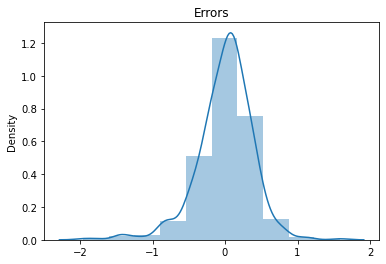

In [68]:
sns.distplot(y_train-y_train_pred,bins=10)
plt.title('Errors')
plt.show()

## Predictions

In [69]:
## scaling the variables in test set same as train set
scale_var=  ['cnt','temp','hum','windspeed']
bike_data_test[scale_var]=scaler.fit_transform(bike_data_test[scale_var])

In [70]:
bike_data_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
333,0,1,-0.933199,-0.191057,1.163362,-0.515259,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
203,0,1,1.840040,-0.986328,-0.667113,-0.691665,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
279,0,0,0.049998,0.305994,-2.090678,0.222632,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
483,0,1,-0.227767,-0.375256,-0.854338,0.932019,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
267,0,1,0.702527,1.434578,-1.724581,0.236078,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [71]:
## dividing into X & y sets
y_test=bike_data_test.pop('cnt')
X_test=bike_data_test

In [72]:
print(X_test.shape)
print(y_test.shape)

(146, 28)
(146,)


In [73]:
## creating test model
X_test_lm=sm.add_constant(X_test,1)

In [74]:
## dropping all the variables which were dropped during train set modelling
drop_col=['mnth_Mar', 'mnth_Aug', 'mnth_Jun' ,'weekday_Sun','mnth_Oct','weekday_Thu', 'weekday_Wed','season_Summer',
          'weekday_Mon' ,'mnth_Feb' ,'weekday_Tue','weekday_Sat']

X_test_lm=X_test_lm.drop(drop_col,axis=1)

In [75]:
y_pred_n=reg_12.predict(X_test_lm)

## Model evaluation

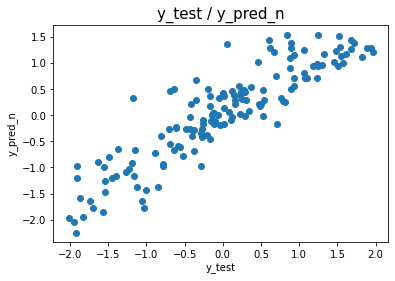

In [76]:
plt.scatter(y_test,y_pred_n)
plt.title('y_test / y_pred_n',fontsize=15)
plt.xlabel('y_test')
plt.ylabel('y_pred_n')
plt.show()

## calculating r-score of train and test sets


In [77]:
print('Train-set r value :',r2_score(y_train,y_train_pred))
print('Test-set r value :',r2_score(y_test,y_pred_n))      

Train-set r value : 0.8501823070595826
Test-set r value : 0.8083074378984942


In [78]:
X_train_lm.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_May', 'mnth_Nov', 'mnth_Sep', 'yr_2019', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [79]:
## these features will affect the number of bikes rental

1. holiday

2. workingday

3. temp

4. hum

5. windspeed